In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

## 1. Load Raw Data With Domain Age and status

In [97]:
phish=pd.read_csv("../data/malicious_phish_domain.csv")
phish.head()

,url,type,domain_age,domain_status
0,br-icloud.com.br,phishing,0,0
1,br-icloud.com.br,phishing,0,0
2,mp3raid.com/music/krizz_kaliko.html,benign,9214,2
3,bopsecrets.org/rexroth/cr/1.htm,benign,9234,2
4,http://www.garage-pirenne.be/index.php?option=...,defacement,0,0


In [98]:
phish.tail()

,url,type,domain_age,domain_status
137296,http://pastehtml.com/view/bc3pjqupk.html,phishing,0,0
137297,indianamusicscene.com/,benign,0,0
137298,english.ryukyushimpo.jp/2011/04/25/357/,benign,7407,2
137299,aso.com/listings/AircraftListings.aspx?m_id=10...,benign,9985,2
137300,pewterreport.com/index.php?option=com_k2&view=...,benign,8407,2


# 2. Analyze Raw Data

In [99]:
phish.shape[0]

137301

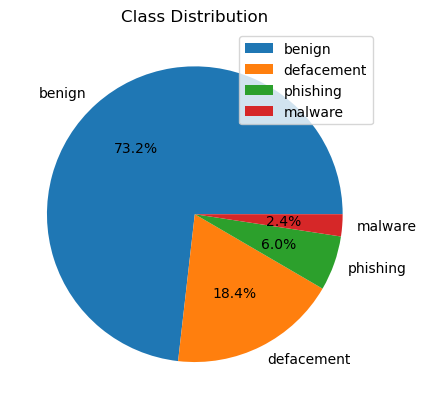

In [100]:
plt.pie(phish['type'].value_counts(), labels=['benign', 'defacement','phishing','malware'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [101]:
phish['type'].value_counts()

type
benign        100500
defacement     25269
phishing        8222
malware         3310
Name: count, dtype: int64

## 2. Load Raw data

In [102]:

raw_df = pd.read_csv("../data/malicious_phish.csv")
phishing_df = raw_df[raw_df['type'] == 'phishing'].sample(n=22000)
malware_df = raw_df[raw_df['type'] == 'malware'].sample(n=20000)
defacement_df = raw_df[raw_df['type'] == 'defacement'].sample(n=6000)
malicious_df = pd.concat([defacement_df,phishing_df, malware_df])
malicious_df['type'].value_counts()


type
phishing      22000
malware       20000
defacement     6000
Name: count, dtype: int64

### 2.1 Take a sample of malicious dataset

In [103]:
sample_malicious_df = malicious_df
sample_malicious_df['type'].value_counts()

type
phishing      22000
malware       20000
defacement     6000
Name: count, dtype: int64

In [104]:
sample_malicious_df.tail()

,url,type
547736,http://123.11.1.246:40430/Mozi.m,malware
538079,http://bearsselection.xyz/ApiServices-Files133...,malware
456074,http://9779.info/%E6%B0%91%E6%97%8F%E5%B8%83%E...,malware
40214,buja.org.il/wp-content/themes/chagim/library/i...,malware
553834,http://119.86.80.74:39911/Mozi.m,malware


In [105]:
sample_malicious_df['domain_age'] = 0
sample_malicious_df['domain_status'] = 0
sample_malicious_df.head()

,url,type,domain_age,domain_status
304879,http://manosunidasciudadreal.org/index.php?opt...,defacement,0,0
3798,http://www.thc-hanau.de/index.php/geschaeft,defacement,0,0
210614,http://spectrumclub.net/component/banners/click/6,defacement,0,0
377915,http://www.masrealestate.it/index.php?option=c...,defacement,0,0
416559,http://www.skirennlauf.de/index.html?page=shop...,defacement,0,0


In [106]:
final_df = pd.concat([phish, sample_malicious_df])
final_df.drop_duplicates(inplace=True)
final_df['type'].value_counts()

type
benign        100500
defacement     29554
phishing       28318
malware        15316
Name: count, dtype: int64

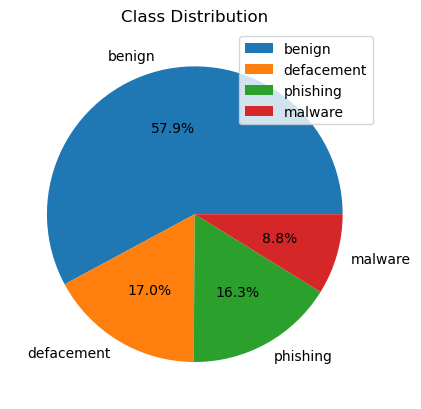

In [107]:
plt.pie(final_df['type'].value_counts(), labels=[
        'benign', 'defacement', 'phishing', 'malware'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.show()

## Save data

In [108]:
final_df.to_csv("../data/mp_normalised_data.csv", index=False)

##